In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import plotly.express as px
%matplotlib inline


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
TEST_ORIGINAL = test.copy()
TRAIN_ORIGINAL = train.copy()

In [4]:
test.columns,train.columns

(Index(['ID', 'Datetime'], dtype='object'),
 Index(['ID', 'Datetime', 'Count'], dtype='object'))

In [5]:
train['Datetime'] = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime'] = pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")

In [6]:
TEST_ORIGINAL['Datetime'] = pd.to_datetime(TEST_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")
TRAIN_ORIGINAL['Datetime'] = pd.to_datetime(TRAIN_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")

In [7]:
for i in (train,test,TRAIN_ORIGINAL,TEST_ORIGINAL):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [8]:
train['day_of_week'] = train.Datetime.dt.day_of_week

In [9]:
weekends = lambda x : True if(x == 5 or x == 6) else False 
train['weekend'] = train.day_of_week.apply(weekends)

In [10]:
train.index = train.Datetime

In [11]:
train.drop(['ID','Datetime'],axis=1,inplace=True)

In [12]:
train

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,5,True
2012-08-25 02:00:00,6,2012,8,25,2,5,True
2012-08-25 03:00:00,2,2012,8,25,3,5,True
2012-08-25 04:00:00,2,2012,8,25,4,5,True
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,False
2014-09-25 20:00:00,732,2014,9,25,20,3,False
2014-09-25 21:00:00,702,2014,9,25,21,3,False


# Analytics

<AxesSubplot:xlabel='year'>

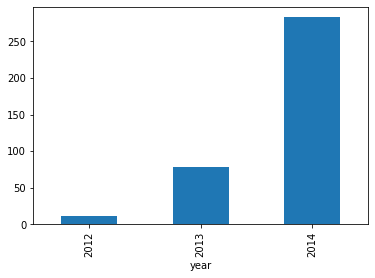

In [13]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

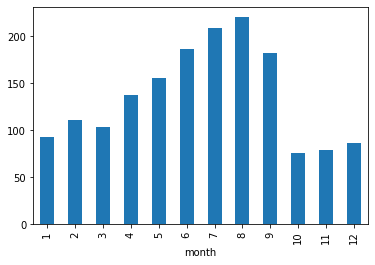

In [14]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

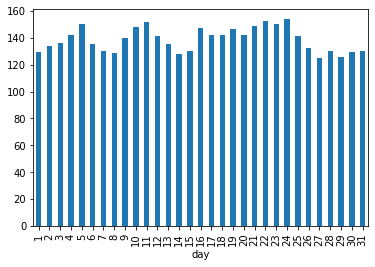

In [15]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

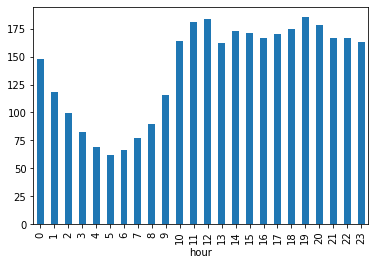

In [16]:
train.groupby('hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='year,month'>

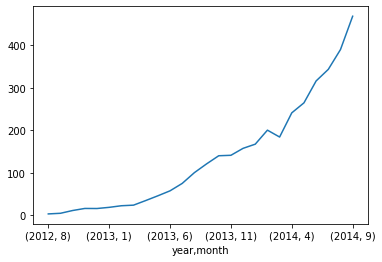

In [17]:
train.groupby(['year','month'])['Count'].mean().plot()

<AxesSubplot:xlabel='day_of_week'>

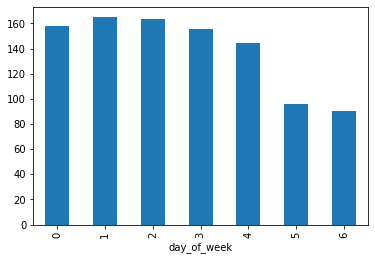

In [18]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

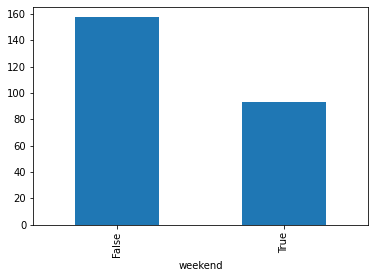

In [19]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [20]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()


In [21]:
hourly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,5,True
2012-08-25 02:00:00,6,2012,8,25,2,5,True
2012-08-25 03:00:00,2,2012,8,25,3,5,True
2012-08-25 04:00:00,2,2012,8,25,4,5,True
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,False
2014-09-25 20:00:00,732,2014,9,25,20,3,False
2014-09-25 21:00:00,702,2014,9,25,21,3,False


In [22]:
daily

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,True
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,True
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,False
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,False
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,False
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,True
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,False
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,False


In [23]:
weekly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714
...,...,...,...,...,...,...,...
2014-08-31,418.023810,2014.0,8.000000,28.000000,11.5,3.0,0.285714
2014-09-07,446.190476,2014.0,9.000000,4.000000,11.5,3.0,0.285714
2014-09-14,392.297619,2014.0,9.000000,11.000000,11.5,3.0,0.285714


In [24]:
monthly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


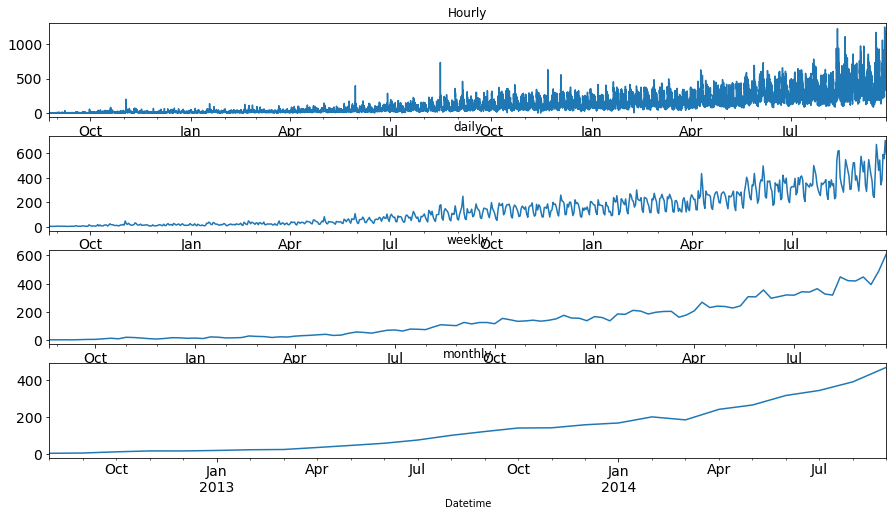

In [25]:
fig,axis = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axis[0])
daily.Count.plot(figsize=(15,8),title='daily',fontsize=14,ax=axis[1])
weekly.Count.plot(figsize=(15,8),title='weekly',fontsize=14,ax=axis[2])
monthly.Count.plot(figsize=(15,8),title='monthly',fontsize=14,ax=axis[3])
plt.show()

In [26]:
test.index = test.Datetime

In [27]:
test.drop('Datetime',1,inplace=True)

In [28]:
test

,ID,year,month,day,hour
Datetime,,,,,
2014-09-26 00:00:00,18288,2014,9,26,0
2014-09-26 01:00:00,18289,2014,9,26,1
2014-09-26 02:00:00,18290,2014,9,26,2
2014-09-26 03:00:00,18291,2014,9,26,3
2014-09-26 04:00:00,18292,2014,9,26,4
...,...,...,...,...,...
2015-04-26 19:00:00,23395,2015,4,26,19
2015-04-26 20:00:00,23396,2015,4,26,20
2015-04-26 21:00:00,23397,2015,4,26,21


In [29]:
test = test.resample("D").mean()
train = train.resample("D").mean()

In [30]:
train

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,True
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,True
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,False
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,False
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,False
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,True
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,False
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,False


In [31]:
train

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,True
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,True
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,False
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,False
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,False
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,True
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,False
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,False


In [32]:
Train = train.loc['2012-08-25':'2014-06-24']
Valid = train.loc['2014-06-25':'2014-09-25']

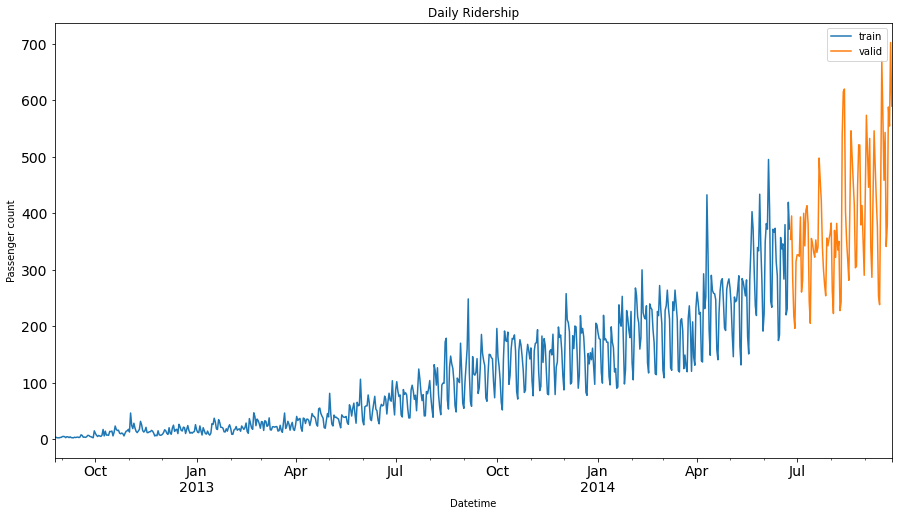

In [33]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()


# Models to Forecast the Series:

## 1. Naive's Method

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

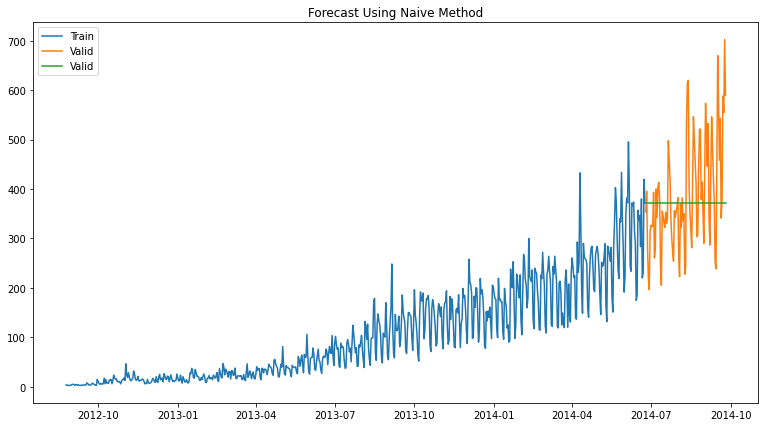

In [34]:
dd = np.asarray(Train.Count)
y_hat = Valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(13,7))
plt.plot(Train.index,Train.Count,label="Train")
plt.plot(Valid.index,Valid.Count,label="Valid")
plt.plot(y_hat.index,y_hat.naive,label="Valid")
plt.legend(loc='best')
plt.title("Forecast Using Naive Method")
plt.show()


Now we will caluclate the the accuracy of the prediction by using **RMSE**(Root Mean Square Error)

Formula:
rmse=sqrt∑i=1N1N(p−a)2

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Valid.Count,y_hat.naive))
rmse

111.79050467496724

Due to Very **High Error Value** **Naive Method** is not suiteable for data sets with High variability

## 2. Moving Averages

Takes the averages for the previous values

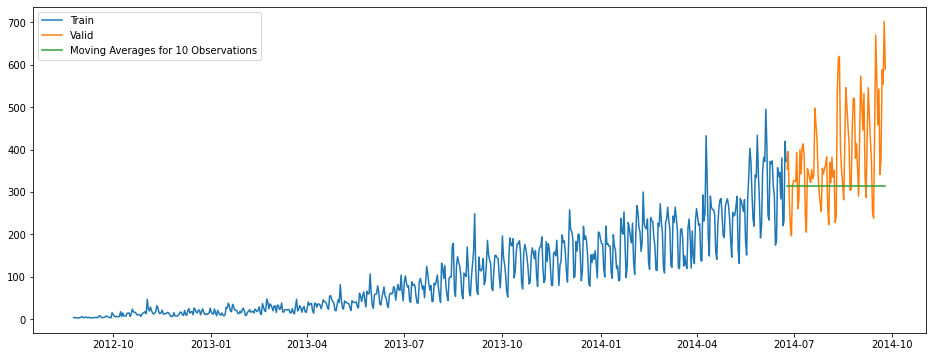

RMSE : 134.23733308950264


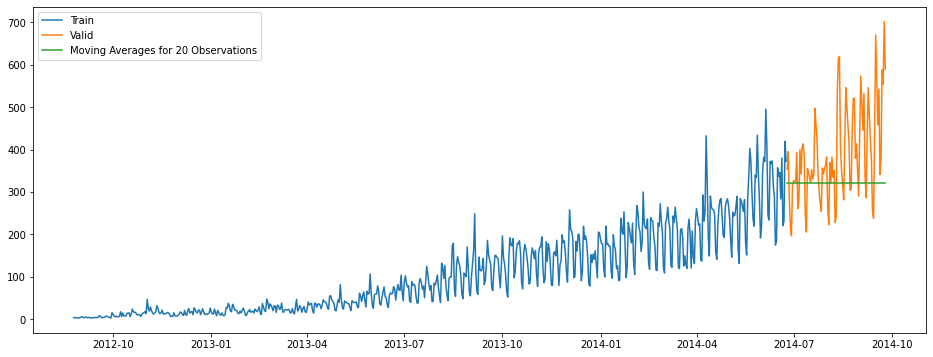

RMSE : 130.4498497755042


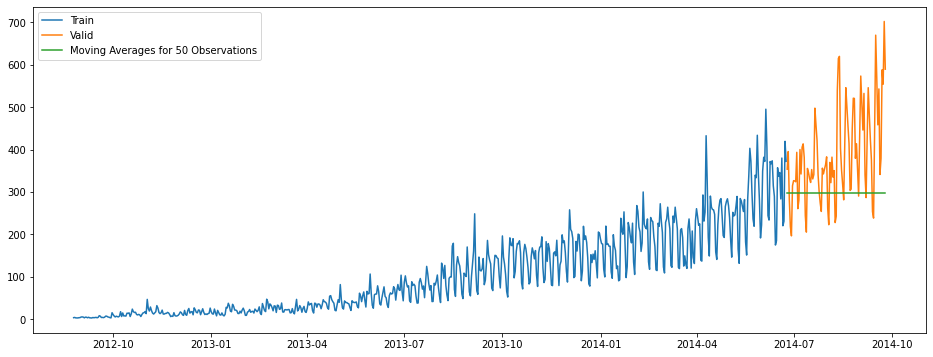

RMSE : 144.19175679986793


In [36]:
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg'] = Train.Count.rolling(10).mean().iloc[-1]
plt.figure(figsize=(16,6))
plt.plot(Train.Count,label="Train")
plt.plot(Valid.Count,label="Valid")
plt.plot(y_hat_avg.moving_avg,label="Moving Averages for 10 Observations")
plt.legend(loc='best')
plt.show()

rmse = sqrt(mean_squared_error(Valid.Count,y_hat_avg.moving_avg))
print("RMSE :",rmse)

y_hat_avg = Valid.copy()
y_hat_avg['moving_avg'] = Train.Count.rolling(20).mean().iloc[-1]
plt.figure(figsize=(16,6))
plt.plot(Train.Count,label="Train")
plt.plot(Valid.Count,label="Valid")
plt.plot(y_hat_avg.moving_avg,label="Moving Averages for 20 Observations")
plt.legend(loc='best')
plt.show()


rmse = sqrt(mean_squared_error(Valid.Count,y_hat_avg.moving_avg))
print("RMSE :",rmse)

y_hat_avg = Valid.copy()
y_hat_avg['moving_avg'] = Train.Count.rolling(50).mean().iloc[-1]
plt.figure(figsize=(16,6))
plt.plot(Train.Count,label="Train")
plt.plot(Valid.Count,label="Valid")
plt.plot(y_hat_avg.moving_avg,label="Moving Averages for 50 Observations")
plt.legend(loc='best')
plt.show()


rmse = sqrt(mean_squared_error(Valid.Count,y_hat_avg.moving_avg))
print("RMSE :",rmse)


## 3. Simple Exponential Smoothing

- Larger weights are assigned to more recent observations than to observations from the distant past
- The weights Exponentially grow as observations come form further in the past the smallest weights are associated with the oldest observations

a:\Python Time Series\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


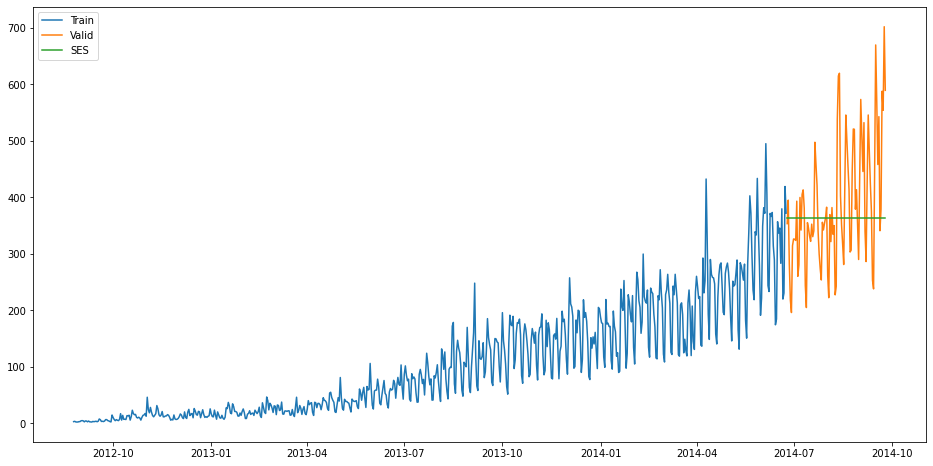

RMSE : 113.43708111884514


In [37]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

y_hat_avg = Valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot(Train.Count,label="Train")
plt.plot(Valid.Count,label="Valid")
plt.plot(y_hat_avg.SES,label="SES")
plt.legend(loc='best')
plt.show()


rmse = sqrt(mean_squared_error(Valid.Count,y_hat_avg.SES))
print("RMSE :",rmse)

## 4. Holt's Linear Trend Model

- It is an extension of simple exponential smoothing to allow forecasting od data with a Trend
- This method takes into account the trend of the data set. The forecast function in this method is a function of level and trend

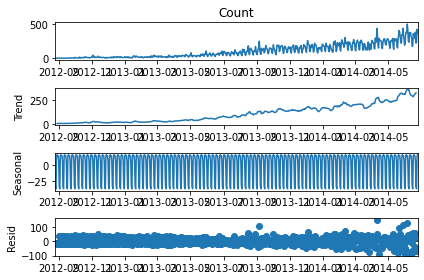

In [38]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

a:\Python Time Series\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


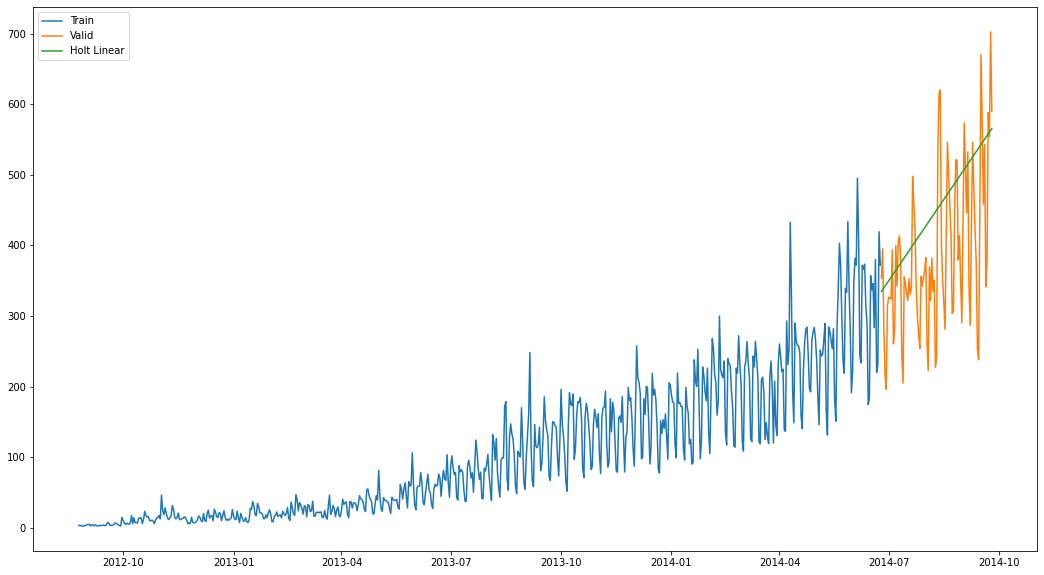

RMSE : 112.94278345314041


In [39]:
y_hot_avg = Valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_trend=0.1)
y_hot_avg['Hot_linear']= fit1.forecast(len(Valid))
plt.figure(figsize=(18,10))
plt.plot(Train['Count'],label="Train")
plt.plot(Valid['Count'],label="Valid")
plt.plot(y_hot_avg['Hot_linear'],label="Holt Linear")
plt.legend(loc='best')
plt.show()

print("RMSE :",sqrt(mean_squared_error(Valid.Count,y_hot_avg.Hot_linear)))

In [40]:
submission = pd.read_csv("submission.csv")
predict = fit1.forecast(len(test))
test['prediction'] = predict

# Calculating Hourly ratio for Count
TRAIN_ORIGINAL['ratio'] = TRAIN_ORIGINAL['Count']/TRAIN_ORIGINAL['Count'].sum()

# Grouping hourly ratio 
temp = TRAIN_ORIGINAL.groupby(['hour'])['ratio'].sum()

# Groupby to csv format 
pd.DataFrame(temp,columns=['hour','ratio']).to_csv('GroupBy.csv')

temp2 = pd.read_csv('GroupBy.csv')
temp2.drop('hour.1',1)

# Merging test and orginal on on day,month,year

merge = pd.merge(test,TEST_ORIGINAL,on=('day','month','year'),how='left')
merge['hour'] = merge['hour_y']
merge= merge.drop(['year','month','Datetime','hour_x','hour_y'],axis=1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge,temp2,on='hour',how='left')

# Converting the ratio to original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

# Dropping all features from submission file keeping ID and Count only
submission = prediction.drop(['ID_x','day','ID_y','prediction','hour','ratio'],axis=1)
# Convering to the final submission format

pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt Linear.csv')



## 4. Holt's Winter Model on Daily Time Series

- Data sets which a similiar set of apttern after of time period from seasonility.
- Works for buth trend and seasonility to forecast future prices
- The idea behind Holt's Winter method is to apply exponential smoothing to seasonal componnets in addtion to leveel and trend



In [ ]:
y_hat_avg = Valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train.Count),seasonal_periods=7,treand="add",seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(Valid))
plt.figure(fgisize=(16,))